# Proyecto de aprendizaje automático de extremo a extremo

### Trabajar con datos reales

Si queremos obtener resultados confiables, es fundamental trabajar con datos reales y no con datos inventados. Los modelos de aprendizaje automático solo pueden aprender patrones útiles si la información que reciben representa el mundo tal como es, con sus imperfecciones, ruido y complejidad.

Afortunadamente, existen múltiples plataformas que recopilan y publican conjuntos de datos abiertos. Muchas de ellas cuentan con comunidades activas que actualizan y comparten información de forma continua, lo que permite acceder a datos variados y de buena calidad.

Algunos de los repositorios de datos abiertos más populares son:

* **OpenML.org**
* **Kaggle.com**
* **PapersWithCode.com**

En este capítulo trabajaremos con el conjunto de datos **California Housing Prices**, que contiene información de un censo realizado en 1990. Nuestro objetivo será utilizar estos datos para construir un modelo capaz de predecir el precio de las viviendas en distintas zonas de California.

### Pipelines

Una **pipeline** es una secuencia de etapas automatizadas que transforman datos de forma organizada y reproducible.

En sistemas de *machine learning*, las pipelines son muy comunes cuando se necesita transformar, limpiar o manipular grandes volúmenes de datos antes de entrenar un modelo. En lugar de hacer cada paso manualmente, se encadenan procesos que se ejecutan uno tras otro.

Cada componente de la pipeline suele cumplir una función específica:

* Extraer datos (por ejemplo, desde una base de datos o un archivo).
* Procesarlos (limpieza, normalización, transformación, generación de características).
* Guardar el resultado en otro almacenamiento para que la siguiente etapa lo utilice.

En muchos sistemas modernos, estas etapas pueden ejecutarse de forma asíncrona o distribuida, lo que permite manejar grandes cantidades de información de manera eficiente.


### Antes de comenzar

Antes de iniciar un proyecto real, debemos preguntarnos cómo vamos a abordar el problema. No se trata solo de “entrenar algo”, sino de elegir correctamente el enfoque desde el principio.

En el caso de **California Housing Prices**, podemos plantearnos varias preguntas clave:

* ¿Qué tipo de aprendizaje necesitamos?
  ¿Supervisado, no supervisado, semi-supervisado, self-supervised o reinforcement learning?

* ¿Usaremos *batch learning* o *online learning*?

Empecemos por lo más sencillo:
¿Nuestro sistema recibirá un flujo constante de datos nuevos para actualizar el modelo? No. El conjunto de datos es histórico y está cerrado; queremos entrenar el modelo para hacer predicciones sobre ese mismo tipo de información. No necesitamos que el modelo se actualice continuamente con datos nuevos, así que utilizaremos **batch learning**.

Ahora, ¿qué tipo de aprendizaje es?
Tenemos el precio de las casas (la variable objetivo) y múltiples características asociadas a cada vivienda. Es decir, conocemos la respuesta correcta durante el entrenamiento. Por lo tanto, se trata claramente de **aprendizaje supervisado**.

Finalmente, ¿qué tipo de modelo utilizaremos?
El comportamiento que buscamos modelar es esencialmente lineal. Sin embargo, no tenemos una sola variable explicativa, sino varias características que influyen en el precio. Por esta razón, no basta con una regresión lineal simple: utilizaremos **regresión lineal múltiple**, que nos permite considerar múltiples variables de entrada al mismo tiempo.

### Métrica de desempeño

Para asegurarnos de que nuestro modelo realmente funciona bien, necesitamos definir una **métrica de desempeño**. Sin una métrica, no hay forma rigurosa de saber si el modelo está aprendiendo o simplemente ajustándose al azar.

En problemas de **regresión lineal**, una de las métricas más utilizadas es el **Root Mean Square Error (RMSE)**. Esta métrica nos indica, en promedio, qué tan lejos están nuestras predicciones de los valores reales.

Una característica importante del RMSE es que **penaliza más fuertemente los errores grandes**, ya que eleva cada error al cuadrado antes de promediarlos. Esto lo hace especialmente útil cuando queremos evitar predicciones con fallos extremos.

La fórmula del RMSE es:

$$
RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2}
$$

donde:

* ( $m$ ) es el número total de ejemplos,
* ( $\hat{y}^{(i)} = h_\theta(x^{(i)}) $) es la predicción generada por la hipótesis para el ejemplo ( i ),
* ( $y^{(i)}$ ) es el valor real correspondiente.

Aquí es importante recordar que ( $h_\theta(\cdot)$ ) es la **función hipótesis**, mientras que ( $\hat{y}^{(i)}$ ) es el resultado de evaluarla en un ejemplo específico.

En la mayoría de problemas reales, las entradas no son números individuales sino **vectores de características**. En ese caso, la hipótesis en regresión lineal se define como:

$$
h_\theta(x) = \theta^T x
$$

Por lo tanto, la predicción para el ejemplo ( i ) es:

$$
\hat{y}^{(i)} = \theta^T x^{(i)}
$$

Y el RMSE puede escribirse como:

$$
RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( \theta^T x^{(i)} - y^{(i)} \right)^2}
$$

Sin embargo, en algunos contextos puede ser preferible utilizar otra función de error. Por ejemplo, podemos considerar el **Mean Absolute Error (MAE)**, también llamado **promedio de desviación absoluta**.

Su expresión es:

$$
MAE = \frac{1}{m} \sum_{i=1}^{m} \left| \hat{y}^{(i)} - y^{(i)} \right|
$$

A diferencia del RMSE, aquí **no elevamos al cuadrado los errores**, sino que tomamos su valor absoluto. Esto hace que el MAE sea menos sensible a valores atípicos (outliers), ya que no amplifica los errores grandes.

### Interpretación geométrica

Tanto el **RMSE** como el **MAE** pueden interpretarse como formas de medir la distancia entre dos vectores:

* El vector de predicciones
* El vector de valores reales (etiquetas)

Si definimos:

$$
\mathbf{\hat{y}} =
\begin{bmatrix}
\hat{y}^{(1)} \
\hat{y}^{(2)} \
\vdots \
\hat{y}^{(m)}
\end{bmatrix}
\quad
\text{y}
\quad
\mathbf{y} =
\begin{bmatrix}
y^{(1)} \
y^{(2)} \
\vdots \
y^{(m)}
\end{bmatrix}
$$

Entonces estamos midiendo la distancia entre esos dos vectores en ( $\mathbb{R}^m$ ).

* Cuando elevamos al cuadrado y sumamos, estamos usando la **norma euclidiana** ( $\ell_2$ ).
* Cuando usamos valores absolutos, estamos usando la **norma Manhattan** ( $\ell_1$ ).

La norma ( $\ell_2$ ) mide la distancia “en línea recta” entre dos puntos (como un dron que vuela directo).

La norma ( $\ell_1$ ) mide la distancia como si te movieras por una ciudad en cuadrícula, avanzando solo en direcciones horizontales y verticales (de ahí el nombre Manhattan).

Estas dos son casos particulares de una familia más general llamada **norma ( $\ell_k$ )**:

$$
|v|_k =
\left(
|v_1|^k + |v_2|^k + \dots + |v_n|^k
\right)^{1/k}
$$

Cuanto mayor sea el valor de ( $k$ ), **más peso tendrán los valores grandes del vector**, y menor influencia relativa tendrán los pequeños.

En otras palabras:
si aumentas ( $k$ ), el modelo se vuelve cada vez más intolerante a errores grandes.


# Empecemos con el código

## Descargar los datos

En un entorno real, lo más común es que la información esté almacenada en una **base de datos relacional**, como PostgreSQL o MySQL, o incluso en sistemas distribuidos más complejos.

Sin embargo, en este proyecto simplificaremos el proceso: trabajaremos con un archivo **CSV** que ya estará disponible dentro del repositorio. Esto nos permitirá concentrarnos en el análisis y el modelado sin distraernos con la infraestructura.

Aunque en un escenario profesional podríamos descargar los datos dinámicamente desde una API o una base de datos externa, para efectos del curso mantendremos todo organizado localmente.

Crearemos una función encargada de:

1. Localizar el archivo dentro del proyecto.
2. Leer el archivo CSV.
3. Cargar los datos en memoria para comenzar a explorarlos.

In [1]:
import os
import pandas as pd
import tarfile

In [2]:
def load_housing_data():
    data_root = os.getcwd()
    data_dir = os.path.join(data_root, "..", "data")
    tgz_path = os.path.join(data_dir, "housing.tgz")
    csv_path = os.path.join(data_dir, "housing/housing.csv")

    # descomprimir si el csv no existe
    if not os.path.exists(csv_path):
        with tarfile.open(tgz_path, "r:gz") as tar:
            tar.extractall(path=data_dir)

    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Usamos el método `info()` para obtener una descripción rápida y general del conjunto de datos.

Este método nos permite ver:

* El número total de filas.
* El número de columnas.
* El nombre de cada atributo.
* El tipo de dato de cada columna (`int`, `float`, `object`, etc.).
* La cantidad de valores no nulos en cada atributo.

Esta información es clave en las primeras etapas del análisis, porque nos ayuda a detectar posibles problemas como valores faltantes, tipos de datos incorrectos o columnas que necesiten transformación.

En otras palabras, `info()` es una inspección inicial que nos permite entender con qué tipo de datos estamos trabajando antes de empezar a modelar.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Como podemos observar, el dataset contiene **20 640 instancias**.

Si analizamos, por ejemplo, la columna `total_bedrooms`, vemos que solo tiene **20 433 valores no nulos**. Esto significa que existen **207 valores faltantes** en ese atributo.

Este tipo de detalle es importante, porque los modelos de machine learning no manejan valores faltantes de forma automática: tendremos que decidir más adelante cómo tratarlos (eliminarlos, imputarlos, etc).

Por otro lado, todos los atributos del dataset son numéricos, excepto `ocean_proximity`, que es un atributo categórico.

Para conocer qué categorías existen en esa columna y cuántas veces aparece cada una, podemos utilizar el método `value_counts()`. Esto nos permite entender la distribución de esa variable antes de transformarla para el modelo.


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

También contamos con el método `describe()`, que nos permite obtener un resumen estadístico de todos los atributos numéricos del dataset.

Este método calcula automáticamente métricas importantes:

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Este método nos permitió conocer el número de datos disponibles, su promedio, la desviación estándar (`std`) y los percentiles 25%, 50% y 75%, que representan los valores por debajo de los cuales se encuentra ese porcentaje de las observaciones.

Un **percentil** indica el valor que deja por debajo a un determinado porcentaje del conjunto de datos (previamente ordenados). Por ejemplo, el percentil 50% corresponde a la mediana: el punto donde la mitad de los valores está por debajo y la otra mitad por encima.

Otra forma sencilla y visual de analizar los datos es construir un **histograma** para cada atributo numérico.

Podemos generar el histograma de una sola variable o visualizar todos los atributos numéricos al mismo tiempo.

En pandas, basta con llamar al método `hist()` sobre el DataFrame, y automáticamente se generarán los histogramas correspondientes. Esto nos permite observar la distribución de cada variable, detectar asimetrías, concentraciones de valores o posibles outliers de forma intuitiva.

In [7]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

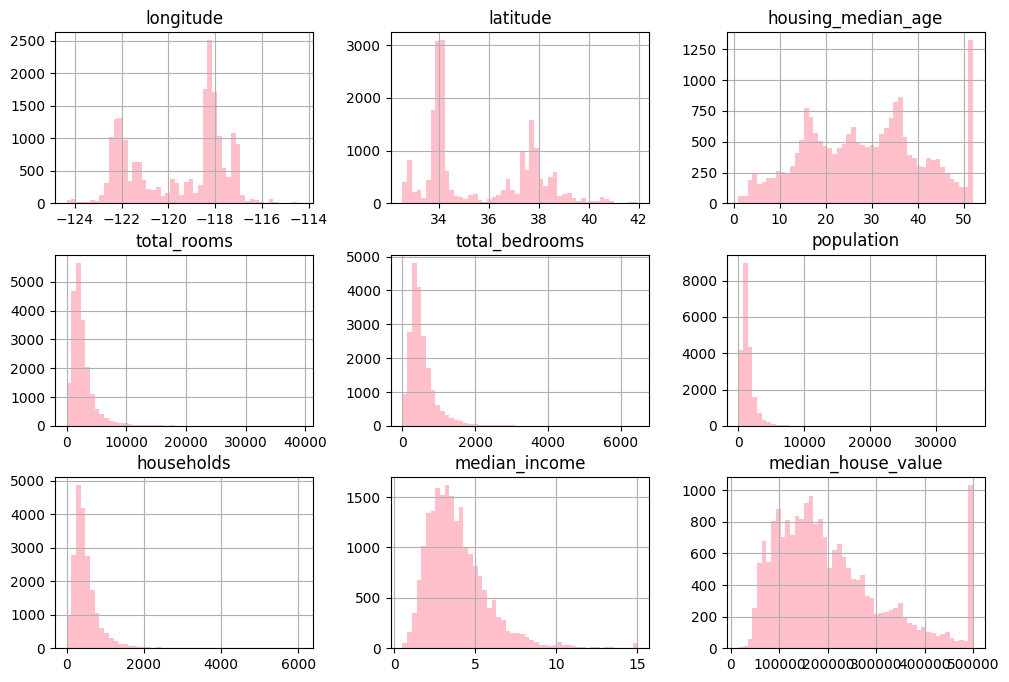

In [8]:
housing.hist(bins=50, figsize=(12,8), color='pink')

Al observar los histogramas podemos notar varios aspectos interesantes.

Por ejemplo, el atributo `median_income` no parece estar medido directamente en dólares. En lugar de representar valores reales como 30 000 o 80 000, los datos parecen estar expresados en una escala reducida, donde el valor más alto ronda aproximadamente 15 y el más bajo cerca de 0.5. Esto sugiere que el ingreso fue previamente transformado o escalado.

Trabajar con atributos preprocesados es algo muy común en machine learning. De hecho, muchas veces los datasets públicos ya vienen parcialmente transformados para facilitar el entrenamiento de modelos. Sin embargo, es fundamental entender cómo fueron calculados o escalados esos datos.

### Crear un set de entrenamiento

Puede parecer extraño comenzar eliminando una parte de los datos en esta etapa. Sin embargo, hay una razón importante para hacerlo: nuestro cerebro es extremadamente bueno encontrando patrones, incluso cuando no debería.

Si analizamos todo el dataset desde el inicio, podemos sesgarnos por la forma en que se distribuyen los datos y terminar tomando decisiones que, sin darnos cuenta, conduzcan al sobreajuste del modelo. En otras palabras, podríamos construir un sistema que funciona muy bien con los datos actuales, pero falla cuando enfrenta datos nuevos.

Por eso es fundamental separar desde el principio un **conjunto de entrenamiento** y un **conjunto de prueba**.

Teóricamente, dividir el dataset es sencillo. Una práctica común es reservar alrededor del 20% de los datos para prueba (o incluso menos si el dataset es muy grande), y usar el resto para entrenar el modelo.

Podemos implementar nuestra propia función para dividir el conjunto de datos de manera controlada y reproducible. De esta forma, mantenemos claridad sobre cómo se realizó la partición y evitamos errores más adelante en el proceso.

In [9]:
import numpy as np
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

Y la funcion se usaria algo asi:

In [10]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


Cuando dividimos el dataset usando aleatoriedad, la partición puede cambiar si los datos se actualizan o se reordenan.
Para garantizar una división estable entre entrenamiento y prueba, incluso cuando el dataset crece, podemos decidir si una instancia pertenece al conjunto de prueba usando una función determinística basada en su identificador (por ejemplo, aplicando un hash al ID). De esta forma, cada instancia siempre caerá en el mismo conjunto sin importar el orden o futuras actualizaciones.

In [11]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Lamentablemente, el dataset de *housing* no incluye una columna que actúe como identificador único para cada instancia.

Para poder aplicar una división estable basada en identificadores, utilizaremos el **índice del DataFrame** como si fuera el ID de cada fila.

Esto nos permitirá aplicar la función hash sobre ese índice y decidir de manera determinística si cada instancia pertenece al conjunto de entrenamiento o al conjunto de prueba.

Es importante tener en cuenta que esta estrategia funciona correctamente siempre que el índice sea estable y no cambie entre ejecuciones o actualizaciones del dataset.

In [12]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
print(len(train_set), "train +", len(test_set), "index")

16512 train + 4128 index


También es posible generar identificadores únicos a partir de atributos que, combinados, sean prácticamente irrepetibles dentro del dataset.

Por ejemplo, podríamos utilizar la **latitud y la longitud** de cada registro para construir un identificador compuesto. Dado que la combinación exacta de ambas coordenadas difícilmente se repetirá entre millones de datos, pueden servir como una base sólida para generar un ID estable.

Este enfoque es útil cuando el dataset no incluye una columna de identificación explícita, pero sí contiene variables cuya combinación garantiza unicidad.

In [13]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")
print(len(train_set), "train +", len(test_set), "id")

16322 train + 4318 id


Scikit-learn ya nos proporciona varias funciones para dividir los datasets de diferentes maneras, lo que nos evita tener que implementar estas utilidades desde cero.

La función más sencilla es `train_test_split()`, que cumple un propósito muy similar al de `shuffle_and_split_data`, la función que definimos anteriormente. Ambas permiten mezclar los datos y separarlos en conjuntos de entrenamiento y prueba.

Ahora veamos qué opciones adicionales nos ofrece `train_test_split()` y cómo podemos aprovecharlas para hacer particiones más flexibles y controladas.

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Este método suele ser adecuado cuando se trabaja con conjuntos de datos grandes, ya que la partición aleatoria tiende a conservar la distribución general de los datos. Sin embargo, si el conjunto es pequeño, existe el riesgo de introducir sesgos de muestreo significativos en la muestra de entrenamiento y prueba.

Cuando se dispone de pocos datos, es necesario realizar un análisis más cuidadoso antes de dividirlos. La selección no puede depender únicamente de una partición aleatoria; debe basarse en un estudio previo del problema y en la estructura real de la población.

Por ejemplo, si se está construyendo un modelo para recomendar joyas y se sabe que aproximadamente el 80 % de las personas que compran joyas son mujeres, no sería coherente entrenar el modelo con un conjunto artificialmente balanceado de 50 % hombres y 50 % mujeres. Esa distribución no reflejaría la realidad y podría inducir un sesgo en el modelo. Por esta razón, es fundamental analizar cuidadosamente qué datos se seleccionan para el entrenamiento, asegurando que la muestra sea representativa del fenómeno real que se desea modelar.

Ahora supongamos que un experto indica que los ingresos medios son un atributo muy importante para predecir el precio de las casas. En ese caso, debemos garantizar que el conjunto de entrenamiento sea representativo en distintas categorías de ingreso. Para lograrlo, primero es necesario crear grupos o intervalos que clasifiquen los ingresos medios, por ejemplo, categorías numeradas del 1 al 5, de modo que cada una esté adecuadamente representada en la partición de datos.


In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf], # la categorias 1 son los ingresos de cero a 1.5, la categoria 2 de 1.5 a 3, etc
    labels=[1, 2, 3, 4, 5])

Miremos la cantidad de cada uno:

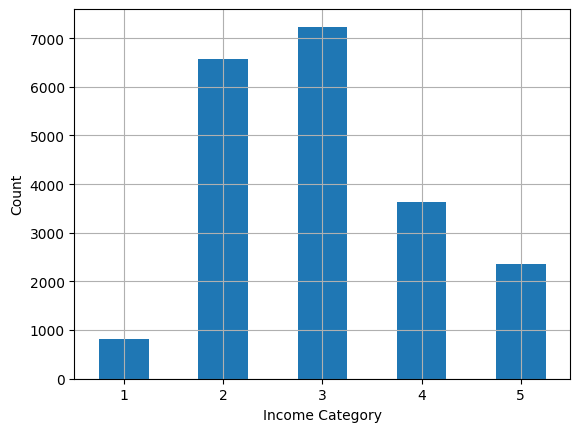

In [16]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()